In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.collections import LineCollection

In [2]:
# In order to efficiently plot many lines in a single set of axes,
# Matplotlib has the ability to add the lines all at once. Here is a
# simple example showing how it is done.

x = np.arange(100)
# Here are many sets of y to plot vs. x
ys = x[:50, np.newaxis] + x[np.newaxis, :]

segs = np.zeros((50, 100, 2))
segs[:, :, 1] = ys
segs[:, :, 0] = x

# Mask some values to test masked array support:
segs = np.ma.masked_where((segs > 50) & (segs < 60), segs)

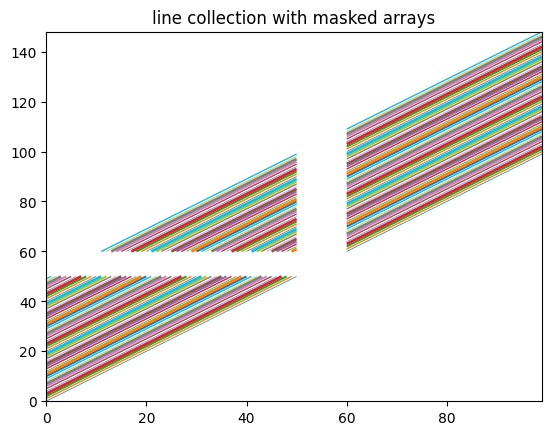

In [3]:
fig, ax = plt.subplots()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(ys.min(), ys.max())

# *colors* is sequence of rgba tuples. *linestyle* is a string or dash tuple.
# Legal string values are solid|dashed|dashdot|dotted.
# The dash tuple is (offset, onoffseq) where onoffseq is an even length tuple
# of on and off ink in points. If linestyle is omitted, 'solid' is used.
# See `matplotlib.collections.LineCollection` for more information.
colors = [
    mcolors.to_rgba(c) for c in plt.rcParams["axes.prop_cycle"].by_key()["color"]
]

line_segments = LineCollection(
    segs, linewidths=(0.5, 1, 1.5, 2), colors=colors, linestyle="solid",
)

ax.add_collection(line_segments)
ax.set_title("line collection with masked arrays")

plt.show()

In [4]:
N = 50
x = np.arange(N)
# Here are many sets of y to plot vs. x
ys = [x + i for i in x]

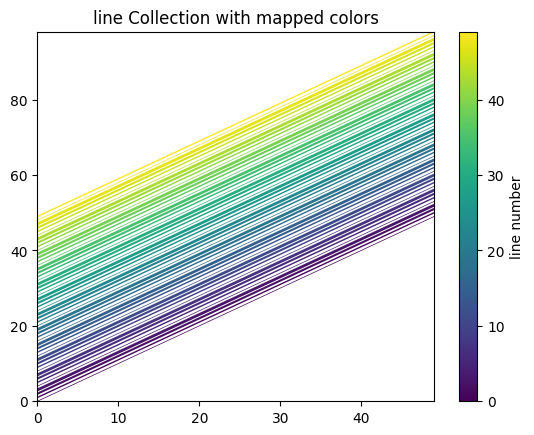

In [5]:
fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))

line_segments = LineCollection(
    [np.column_stack([x, y]) for y in ys],
    linewidths=(0.5, 1, 1.5, 2), linestyle="solid",
)

line_segments.set_array(x)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label("line number")
ax.set_title("line Collection with mapped colors")

plt.sci(line_segments) # This allows interactive changing of the colormap
plt.show()